### introduction

Data on over 9,000 bites, including rabies tests


In the United States, animal bites are often reported to law enforcement (such as animal control). The main concern with an animal bite is that the animal may be rabid. This dataset includes information on over 9,000 animal bites which occurred near Louisville, Kentucky from 1985 to 2017 and includes information on whether the animal was quarantined after the bite occurred and whether that animal was rabid.

#### Content


- bite_date: The date the bite occurred
- SpeciesIDDesc: The species of animal that did the biting
- BreedIDDesc: Breed (if known)
- GenderIDDesc: Gender (of the animal)
- color: color of the animal
- vaccination_yrs: how many years had passed since the last vaccination
- vaccination_date: the date of the last vaccination
- victim_zip: the zipcode of the victim
- AdvIssuedYNDesc: whether advice was issued
- WhereBittenIDDesc: Where on the body the victim was bitten
- quarantine_date: whether the animal was quarantined
- DispositionIDDesc: whether the animal was released from quarantine
- headsentdate: the date the animal’s head was sent to the lab
- release_date: the date the animal was released
- ResultsIDDesc: results from lab tests (for rabies)


In [147]:
import pandas  as pd
import seaborn as sns
import numpy   as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [148]:
df = pd.read_csv('Health_AnimalBites.csv')
df.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN


In [149]:
df.dtypes

bite_date             object
SpeciesIDDesc         object
BreedIDDesc           object
GenderIDDesc          object
color                 object
vaccination_yrs      float64
vaccination_date      object
victim_zip            object
AdvIssuedYNDesc       object
WhereBittenIDDesc     object
quarantine_date       object
DispositionIDDesc     object
head_sent_date        object
release_date          object
ResultsIDDesc         object
dtype: object

 - some of columns should be converted into datetime data type


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9003 entries, 0 to 9002
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bite_date          8686 non-null   object 
 1   SpeciesIDDesc      8885 non-null   object 
 2   BreedIDDesc        3759 non-null   object 
 3   GenderIDDesc       6477 non-null   object 
 4   color              6426 non-null   object 
 5   vaccination_yrs    3738 non-null   float64
 6   vaccination_date   4115 non-null   object 
 7   victim_zip         7165 non-null   object 
 8   AdvIssuedYNDesc    2565 non-null   object 
 9   WhereBittenIDDesc  8387 non-null   object 
 10  quarantine_date    2020 non-null   object 
 11  DispositionIDDesc  1535 non-null   object 
 12  head_sent_date     395 non-null    object 
 13  release_date       1445 non-null   object 
 14  ResultsIDDesc      1543 non-null   object 
dtypes: float64(1), object(14)
memory usage: 1.0+ MB


In [151]:
df.isnull().sum()

bite_date             317
SpeciesIDDesc         118
BreedIDDesc          5244
GenderIDDesc         2526
color                2577
vaccination_yrs      5265
vaccination_date     4888
victim_zip           1838
AdvIssuedYNDesc      6438
WhereBittenIDDesc     616
quarantine_date      6983
DispositionIDDesc    7468
head_sent_date       8608
release_date         7558
ResultsIDDesc        7460
dtype: int64

In [152]:
# Function that will take an input table with aggregated values to columns, and then create an output table with 
# two columns - the values and the percentage of total values in that column
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [8]:
missing_values_table(df)

Your selected dataframe has 15 columns.
There are 15 columns that have missing values.


,Missing Values,% of Total Values
head_sent_date,8608,95.6
release_date,7558,83.9
DispositionIDDesc,7468,83.0
ResultsIDDesc,7460,82.9
quarantine_date,6983,77.6
AdvIssuedYNDesc,6438,71.5
vaccination_yrs,5265,58.5
BreedIDDesc,5244,58.2
vaccination_date,4888,54.3
color,2577,28.6


So, all columns have missing values, but some are clearly more complete than others. "bite_date", "SpeciesIDDesc" and "WhereBittenIDDesc" all have less than 1,000 missing values, while "head_sent_date" has 8608 missing values out of the 9,003 total examples, which makes sense, considering this gives information on when the animal's head was sent to the lab for testing, which would only happen in a small percentage of the cases.

> - Trying to parse the dates I found that there was a date set as 5013-07-15 00:00:00, which is possibly a typo for 2013
 which index = 4490

In [154]:
df['bite_date'][4490] = '2013-07-15 00:00:00'
df['bite_date'] = pd.to_datetime(df['bite_date'])

<ipython-input-154-5d20191675f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bite_date'][4490] = '2013-07-15 00:00:00'


### Test

In [155]:
df.bite_date.dtypes

dtype('<M8[ns]')

In [160]:
df.vaccination_date = pd.to_datetime(df['vaccination_date'])

In [158]:
df.vaccination_date.dtypes

dtype('<M8[ns]')

In [159]:
df.quarantine_date = pd.to_datetime(df['quarantine_date'])
df.head_sent_date  = pd.to_datetime(df['head_sent_date'])
df.release_date    = pd.to_datetime(df['release_date'])

## Analysis

In [161]:
df.SpeciesIDDesc.value_counts().sort_values(ascending = False).head(10)

DOG        7029
CAT        1568
BAT         237
RACCOON      27
OTHER        11
HORSE         5
FERRET        4
RABBIT        3
SKUNK         1
Name: SpeciesIDDesc, dtype: int64

C:\Users\UP2store\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: 'str' object is not callable

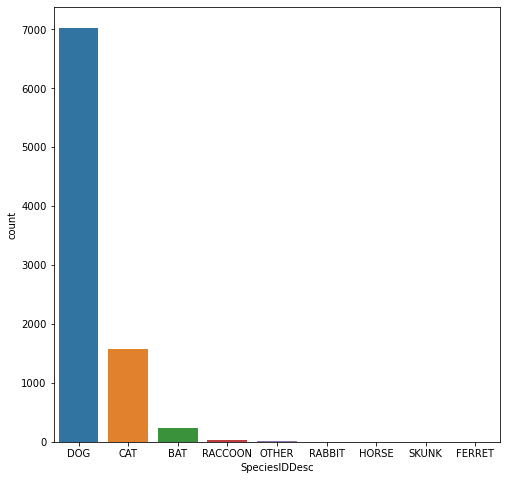

In [162]:
plt.figure(figsize = (8,8))
sns.countplot(df['SpeciesIDDesc']);
plt.title('The species of animal that did the biting');
plt.xlabel('Animal' , color = 'blue');
plt.ylabel('Count' ,  color = 'blue');
plt.xticks(fontsize=12, rotation=90)
plt.show()

dogs are the most common pets which did bitting

C:\Users\UP2store\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


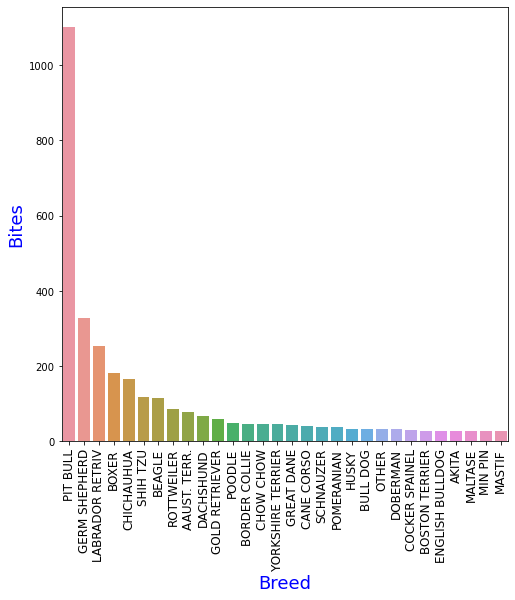

In [163]:
#df_dogs = df.loc[df['SpeciesIDDesc'] == 'DOG']
df_dogs = df.where(df['SpeciesIDDesc'] == "DOG");
x = df_dogs['BreedIDDesc'].value_counts().sort_values(ascending = False).head(30).index
plt.figure(figsize= (8,8))
sns.countplot(df_dogs['BreedIDDesc'],order = x);
plt.xlabel('Breed' , color = 'blue' , fontsize = 18);
plt.ylabel('Bites' , color = 'blue' , fontsize = 18);
plt.xticks(fontsize=12, rotation=90)
plt.show()

In [90]:
df_dogs['GenderIDDesc'].value_counts()

MALE       3307
FEMALE     1601
UNKNOWN     464
Name: GenderIDDesc, dtype: int64

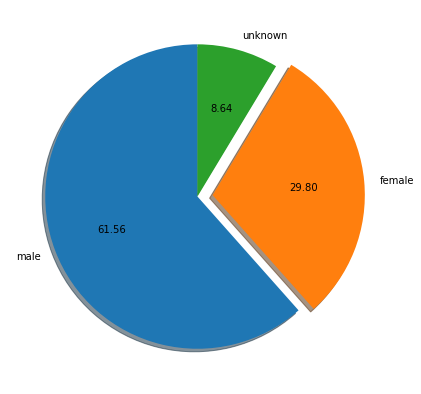

In [164]:
male    = df_dogs[df_dogs['GenderIDDesc'] == 'MALE']
female  = df_dogs[df_dogs['GenderIDDesc'] == 'FEMALE']
unknown = df_dogs[df_dogs['GenderIDDesc'] == 'UNKNOWN']


labels  = ['male','female','unknown']

values = [len(male), len(female),len(unknown)]
values


#explod = [0, 0.1, 0, 0.1]
explod = [0,.1,0]

plt.figure(figsize=(7,7))

plt.pie(labels= labels , x = values,
        explode = explod, startangle = 90, shadow = True,autopct='%.2f')
plt.title=("GENDER OF ANIMAL");


In [165]:
df_dogs_male = df_dogs[df_dogs['GenderIDDesc'] == 'MALE']
df_dogs_male['BreedIDDesc'].value_counts().sort_values(ascending = False).head(30).to_frame()
value = df_dogs_male['BreedIDDesc'].value_counts().sort_values(ascending = False).head(30).values

C:\Users\UP2store\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


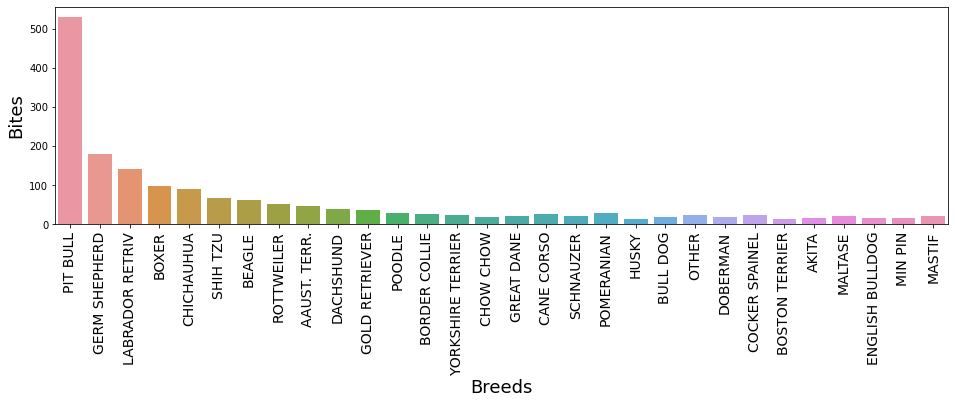

In [168]:
plt.figure(figsize=(16,4))
sns.countplot(df_dogs_male['BreedIDDesc'], order = df_dogs['BreedIDDesc'].value_counts().iloc[0:30].index)
plt.xlabel('Breeds', fontsize=18)
plt.ylabel('Bites', fontsize=18)
plt.xticks(fontsize=14, rotation=90)
plt.show()

In [124]:
df_dogs_female = df_dogs[df_dogs['GenderIDDesc'] == 'FEMALE']
df_dogs_female['BreedIDDesc'].value_counts().sort_values(ascending = False).head(30).to_frame()

,BreedIDDesc
PIT BULL,288
GERM SHEPHERD,69
LABRADOR RETRIV,67
BOXER,53
CHICHAUHUA,45
BEAGLE,33
SHIH TZU,32
AAUST. TERR.,27
DACHSHUND,17
CHOW CHOW,16


C:\Users\UP2store\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


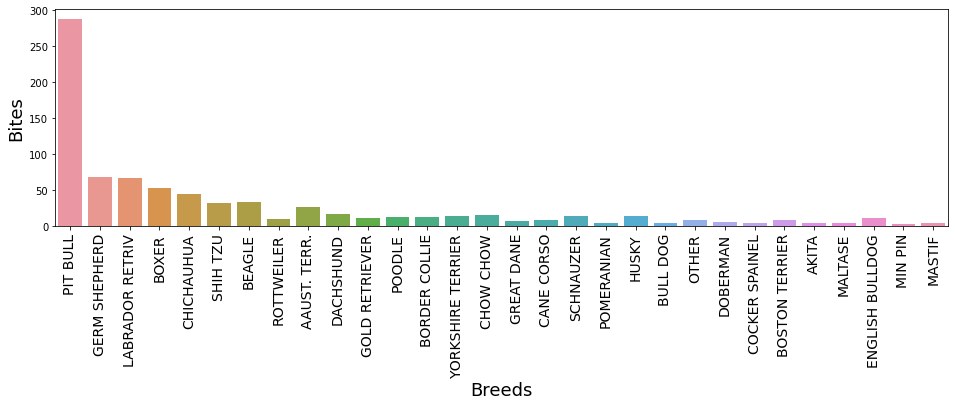

In [169]:
plt.figure(figsize=(16,4))
sns.countplot(df_dogs_female['BreedIDDesc'], order = df_dogs['BreedIDDesc'].value_counts().iloc[0:30].index)
plt.xlabel('Breeds', fontsize=18)
plt.ylabel('Bites', fontsize=18)
plt.xticks(fontsize=14, rotation=90)
plt.show()

C:\Users\UP2store\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


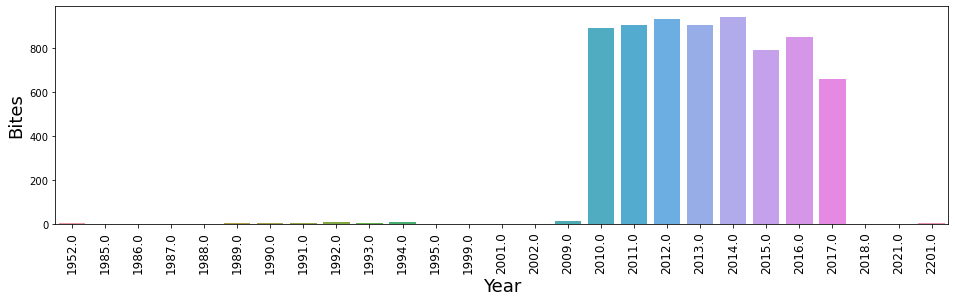

In [170]:
bit_year = df_dogs['bite_date'].dt.year
plt.figure(figsize=(16,4))
sns.countplot(bit_year)
plt.xticks(rotation = 90 , fontsize = 12);
plt.title =('Dog bits per year');
plt.xlabel('Year', fontsize=18)
plt.ylabel('Bites', fontsize=18)
plt.show()

It seems most of the cases in the data set refer to bites which happened since 2010. Also, it seems that there are some dates that do not make sense (2021 and 2201).

In [221]:
df['bit_year'] = df_dogs['bite_date'].dt.year

C:\Users\UP2store\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bit_year'>

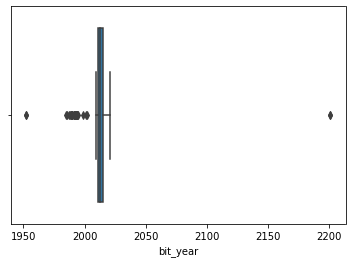

In [224]:
sns.boxplot(df['bit_year'])

In [231]:
Q1 = df['bit_year'].quantile(0.05)
Q3 = df['bit_year'].quantile(0.99)
IQR = Q3 - Q1
print(Q1)
print(Q3)

2010.0
2017.0


In [233]:
df = df[~((df['bit_year'] < (Q1 - 1.5 * IQR)) |(df['bit_year'] > (Q3 + 1.5 * IQR)))]

C:\Users\UP2store\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bit_year'>

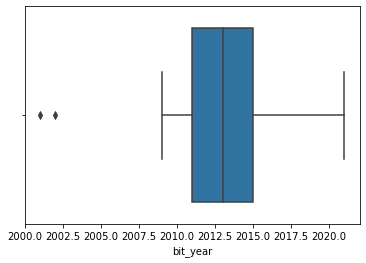

In [234]:
sns.boxplot(df['bit_year'])

C:\Users\UP2store\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


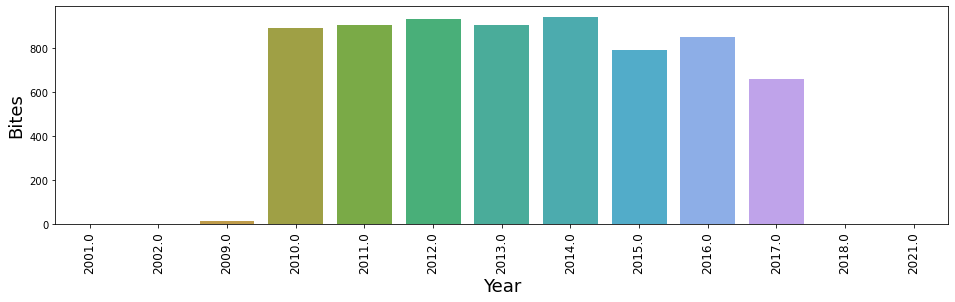

In [236]:
bit_year = df_dogs['bite_date'].dt.year
plt.figure(figsize=(16,4))
sns.countplot(df['bit_year'])
plt.xticks(rotation = 90 , fontsize = 12);
plt.title =('Dog bits per year');
plt.xlabel('Year', fontsize=18)
plt.ylabel('Bites', fontsize=18)
plt.show()

C:\Users\UP2store\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


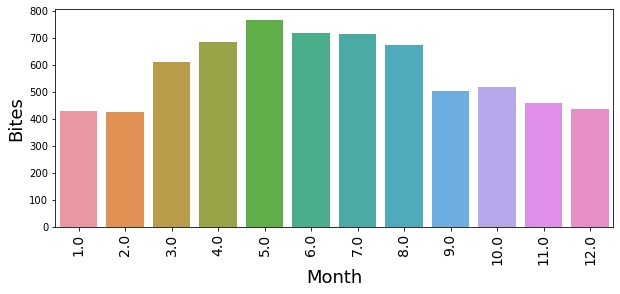

In [171]:
month_bites = dog_breeds['bite_date'].dt.month

plt.figure(figsize=(10,4))
sns.countplot(month_bites)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Bites', fontsize=18)
plt.xticks(fontsize=14, rotation=90)
plt.show()

C:\Users\UP2store\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


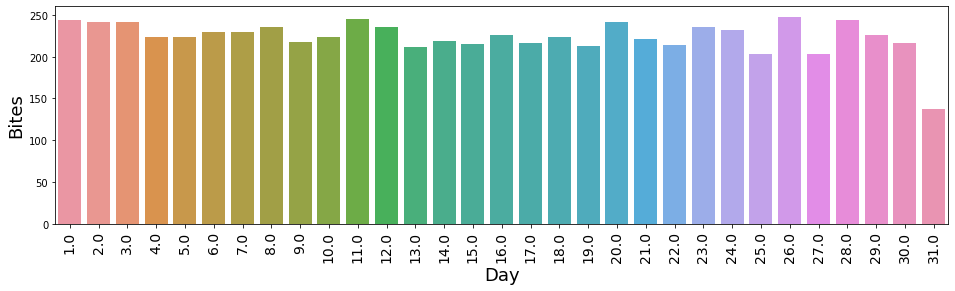

In [174]:
day_bites = dog_breeds['bite_date'].dt.day

plt.figure(figsize=(16,4))
sns.countplot(day_bites)
plt.xlabel('Day', fontsize=18)
plt.ylabel('Bites', fontsize=18)
plt.xticks(fontsize=14, rotation=90)
plt.show()

It seems that more dog bites happen during the summer months, which could be due to more outdoor activities and, thus, more contact with strangers. However, it does not seem that dogs have a preference on which day of the month they bite people, since the distribution is mostly flat, except for the 31st, which only happens in half of the months and, therefore, only shows about half of the bites.

In [176]:
df_dogs['ResultsIDDesc'].value_counts().sort_values(ascending = False)

UNKNOWN     979
NEGATIVE     58
POSITIVE      1
Name: ResultsIDDesc, dtype: int64

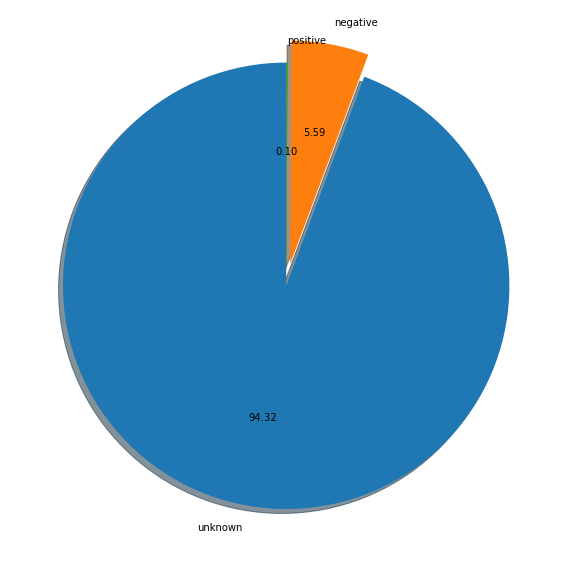

In [181]:
unknown  = df_dogs[df_dogs['ResultsIDDesc'] == 'UNKNOWN']
negative = df_dogs[df_dogs['ResultsIDDesc'] == 'NEGATIVE']
positive = df_dogs[df_dogs['ResultsIDDesc'] == 'POSITIVE']


labels  = ['unknown','negative','positive']

values = [len(unknown), len(negative),len(positive)]
values


#explod = [0, 0.1, 0, 0.1]
explod = [0,.1,0]

plt.figure(figsize=(10,12))

plt.pie(labels= labels , x = values,
        explode = explod, startangle = 90, shadow = True,autopct='%.2f')
plt.title=("results from lab tests (for rabies)");


C:\Users\UP2store\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


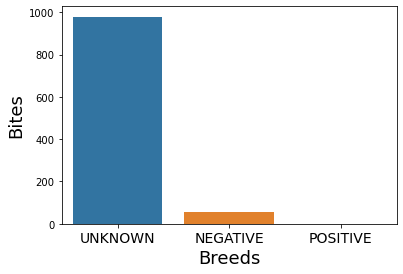

In [183]:
plt.figure(figsize=(6,4))
sns.countplot(dog_breeds['ResultsIDDesc'])
plt.xlabel('Breeds', fontsize=18)
plt.ylabel('Bites', fontsize=18)
plt.xticks(fontsize=14)
plt.show()

In [184]:
print("Where were people bitten by dogs")
print(df_dogs['WhereBittenIDDesc'].value_counts())

Where were people bitten by dogs
BODY       4909
HEAD       1184
UNKNOWN     637
Name: WhereBittenIDDesc, dtype: int64


C:\Users\UP2store\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


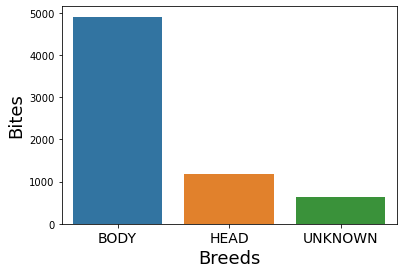

In [185]:
plt.figure(figsize=(6,4))
sns.countplot(dog_breeds['WhereBittenIDDesc'])
plt.xlabel('Breeds', fontsize=18)
plt.ylabel('Bites', fontsize=18)
plt.xticks(fontsize=14)
plt.show()

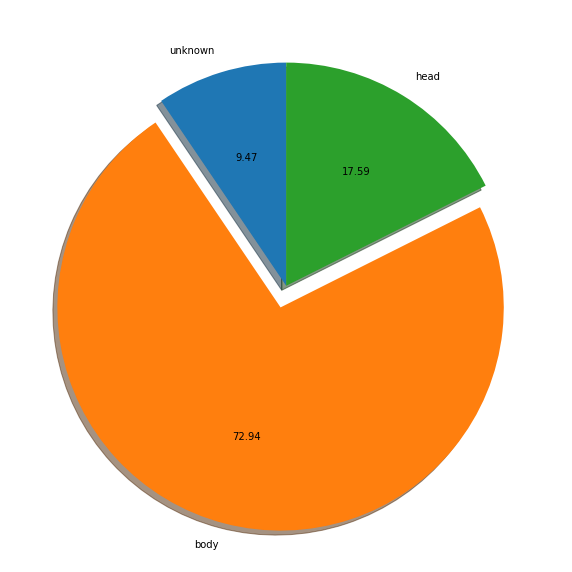

In [186]:
unknown  = df_dogs[df_dogs['WhereBittenIDDesc'] == 'UNKNOWN']
body = df_dogs[df_dogs['WhereBittenIDDesc'] == 'BODY']
head = df_dogs[df_dogs['WhereBittenIDDesc'] == 'HEAD']


labels  = ['unknown','body','head']

values = [len(unknown), len(body),len(head)]
values


#explod = [0, 0.1, 0, 0.1]
explod = [0,.1,0]

plt.figure(figsize=(10,12))

plt.pie(labels= labels , x = values,
        explode = explod, startangle = 90, shadow = True,autopct='%.2f')
plt.title=("Where were people bitten by dogs");


C:\Users\UP2store\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


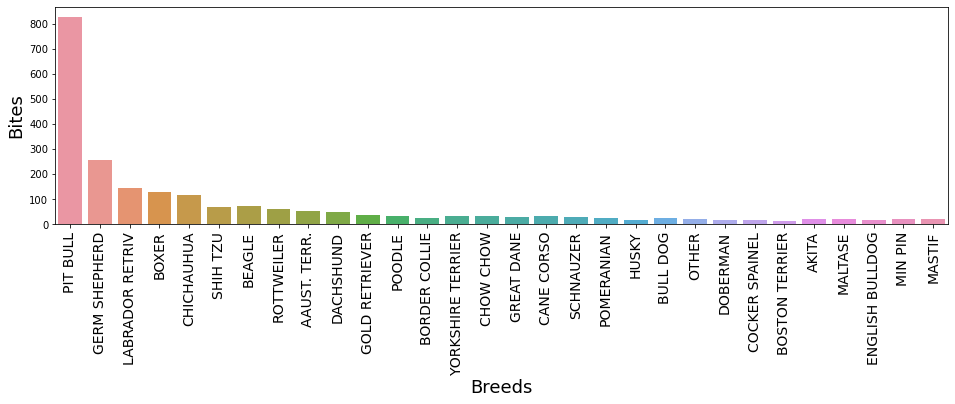

In [191]:
df_dogs_body = df_dogs[df_dogs['WhereBittenIDDesc'] == 'BODY']

plt.figure(figsize=(16,4))
sns.countplot(df_dogs_body['BreedIDDesc'], order = df_dogs['BreedIDDesc'].value_counts().iloc[0:30].index)
plt.xlabel('Breeds', fontsize=18)
plt.ylabel('Bites', fontsize=18)
plt.xticks(fontsize=14, rotation=90)
plt.show()


C:\Users\UP2store\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


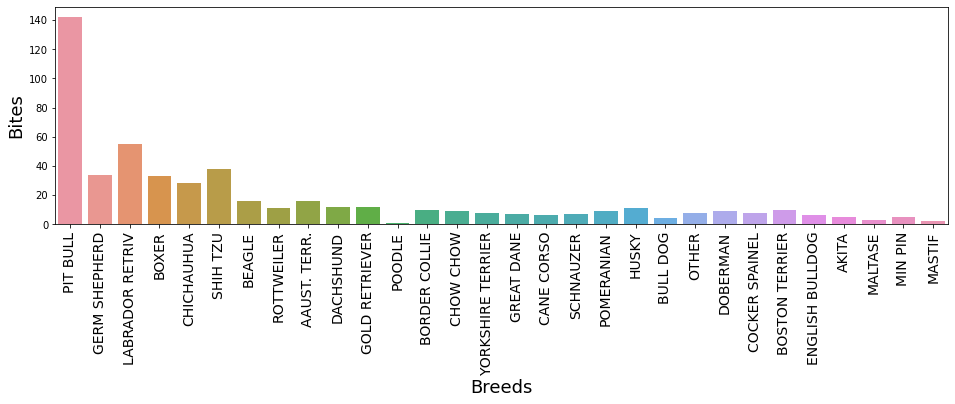

In [194]:
df_dogs_head = df_dogs[df_dogs['WhereBittenIDDesc'] == 'HEAD']

plt.figure(figsize=(16,4))
sns.countplot(df_dogs_head['BreedIDDesc'].sort_values(ascending = False), order = df_dogs['BreedIDDesc'].value_counts().sort_values(ascending = False).iloc[0:30].index)
plt.xlabel('Breeds', fontsize=18)
plt.ylabel('Bites', fontsize=18)
plt.xticks(fontsize=14, rotation=90)
plt.show()

C:\Users\UP2store\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


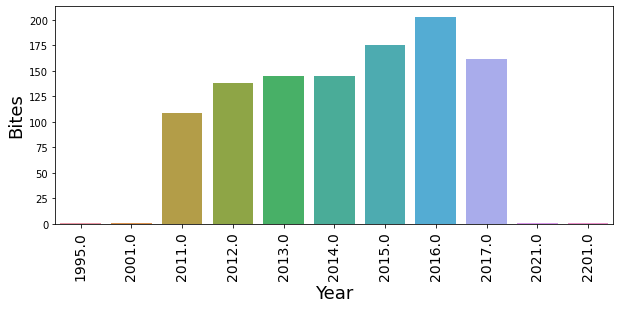

In [205]:
plt.figure(figsize=(10,4))
sns.countplot(dog_breeds['bite_date'].dt.year.where(dog_breeds['BreedIDDesc']=='PIT BULL'))
plt.xlabel('Year', fontsize=18)
plt.ylabel('Bites', fontsize=18)
plt.xticks(fontsize=14, rotation=90)
plt.show()

In [209]:
other = df.loc[(df['SpeciesIDDesc'] != 'DOG') & (df['SpeciesIDDesc'] != 'CAT')]

C:\Users\UP2store\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


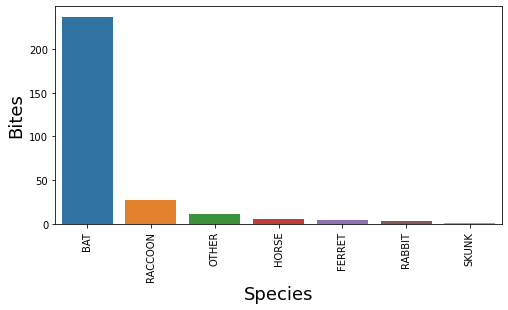

In [213]:
plt.figure(figsize=(8,4))
sns.countplot(other['SpeciesIDDesc'], order = other['SpeciesIDDesc'].value_counts().index)
plt.xlabel('Species', fontsize=18)
plt.ylabel('Bites', fontsize=18)
plt.xticks(fontsize=10, rotation=90)
plt.show()

In [218]:
other['bite_date'] = pd.to_datetime(other['bite_date'])
other['bite_date'].dtypes

<ipython-input-218-fc4720e0a6c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other['bite_date'] = pd.to_datetime(other['bite_date'])


dtype('<M8[ns]')

C:\Users\UP2store\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


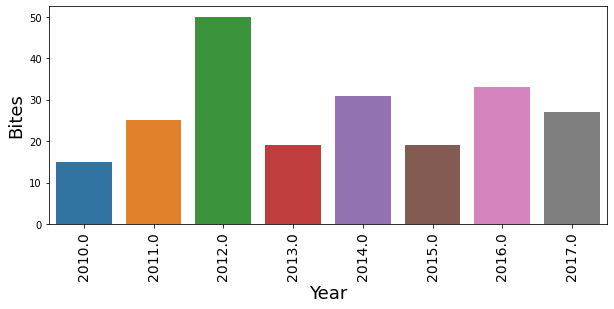

In [220]:
year_others = other['bite_date'].dt.year

plt.figure(figsize=(10,4))
sns.countplot(year_others)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Bites', fontsize=18)
plt.xticks(fontsize=14, rotation=90)
plt.show()